# Problem Data

In this problem we will build and train a neural network to classify images of clothing. The goal is to get the general sense of a TensorFlow project, not to catch every detail, but everything is explained along the way.

#Install and import dependencies

We'll need [TensorFlow Datasets](https://www.tensorflow.org/datasets/), an API that simplifies downloading and accessing datasets, and provides several sample datasets to work with. We're also using a few helper libraries.

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.6MB 5.8MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.4.0


# Import the fashion MNIST dataset

This dataset contains 70000 grayscale images which are labeled in 10 categories. The images show individual articles of clothing at low resolution 28 x 28 pixels.

This dataset is intended as a drop-in replacement for the classic MNIST dataset. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns metadata as well as a training dataset and testing dataset.

* The model is trained using train_dataset
* The model is tested using test_dataset

The images are 28x28 arrays, with pixel values in the range [0, 255]. The labels are an array of integers, in the range [0, 9]. These correspond to the class of clothing the image represents.

Each image is mapped in a single label. Since the class labels are not included with the dataset, store them here to use later when plotting the images.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

Let's explore the format of the training dataset before training the model. The following shows there are 60000 images in the training dataset and each image is represented by 28x28 pixels.

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise there are 60000 labels in the training labels dataset.

In [ ]:
num_train_examples = len(train_labels)
print(num_train_examples)

60000


Each label is a number between 0 and 9

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28x28 pixels.

In [ ]:
test_images.shape

(10000, 28, 28)

Likewise there are 10000 labels in the testing labels dataset.

In [ ]:
num_test_examples = len(test_labels)
print(num_test_examples)

10000


# Preprocess the data

The data needs to be preprocessed before training the network. If you inspect the first image in the training set you will see that pixel values fall in the range of 0 to 255.

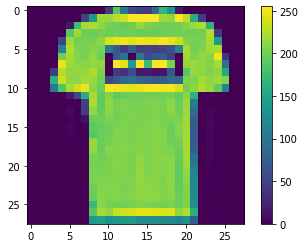

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

We need to scale these values in the range 0 of to 1 before feeding them to the neural network model. To do so, divide the values by 255, it is very important that both the training and the testing dataset are preprocessed the same way.

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

To verify that the data is preprocessed in the correct format and that we are ready to build and train the neural network we can display the first 25 images from the training dataset and the class name below each image.

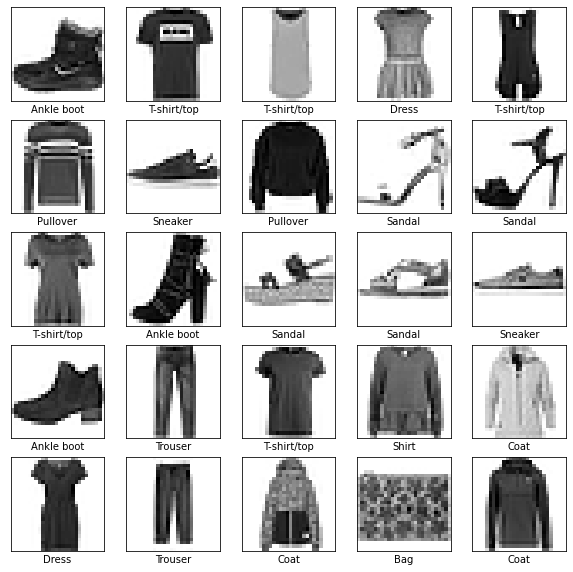

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

Building a neural network requires configuring the layers of the model then compiling the model.

### Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them, hopefully the representations are meaningful to the problem you want to solve. Most of deep learning consists of chaining together simple layers, most layers have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

This network has 3 layers:

* input tf.keras.layers.Flatten - this layer transforms the images from a 2d-array of 28x28 pixels to a 1-d array of 784 pixels (28*28); think of this layer as unstacking the rows of pixels in the image and lining them up; this layer dosen't have parameters to learn, it only reformats the data
* hidden tf.keras.layers.Dense - a densely connected layer of 128 neurons (nodes) which take input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training
* output tf.keras.layers.Dense - a 10 neuron softmax layer where each node represents a piece of clothing; as in the previous example each node takes input from the 128 nodes in the layer before it, weights that input according to learned parameters and outputs a value in the range 0 to 1 representing the probability that the image belongs to that class (piece of clothing); the sum of all 10 nodes values is 1

# Compile the model

Before the model is ready for training it need some more configuration which is done when compiling the model

* loss function - algorithm for calculating model's training accuracy; when doing classification we always specify to use the sparse categorical crossentropy
* optimizer - algorithm for adjusting the inner parameters of the model to minimize loss
* metrics - used to monitor the training and testing steps; the following example uses accuracy, the fraction of the images that are correctly classified

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

# Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.

Verify that the predictions match the labels from the test_labels array.
### Feed the model
To start training, call the model.fit method so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 12.1540 - accuracy: 0.6705
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7979 - accuracy: 0.7188
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6009 - accuracy: 0.7919
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5426 - accuracy: 0.8083
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5180 - accuracy: 0.8166
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8252
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4883 - accuracy: 0.8303
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8330
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4871 - accuracy: 0.8333
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.47

# Evaluate accuracy

Next, we compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_accuracy)

313/313 - 1s - loss: 0.5516 - accuracy: 0.8356

Test accuracy:  0.8356000185012817


It turns out that the accuracy in on the test dataset is smaller than the accuracy on the training dataset. This is normal because your model is handling unseen data.

This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

Learn more about [Overfit and Underfit](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting).

# Make predictions

With the model trained you can use it to make predictions about some images. The models linear output are [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

The model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([4.1935323e-21, 1.4241292e-14, 0.0000000e+00, 2.1797194e-15,
       0.0000000e+00, 3.2660186e-03, 1.4806000e-29, 5.4443437e-03,
       1.2471724e-19, 9.9128962e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. Let's see which label has the highest confidence.

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

# Nicer output with graph

We will graph this to look at the full set of 10 class predictions, but first we will define 2 functions which will help us do that.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

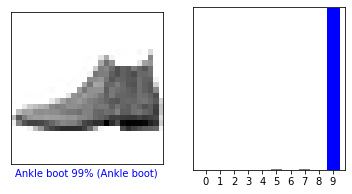

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

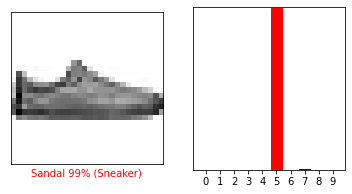

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

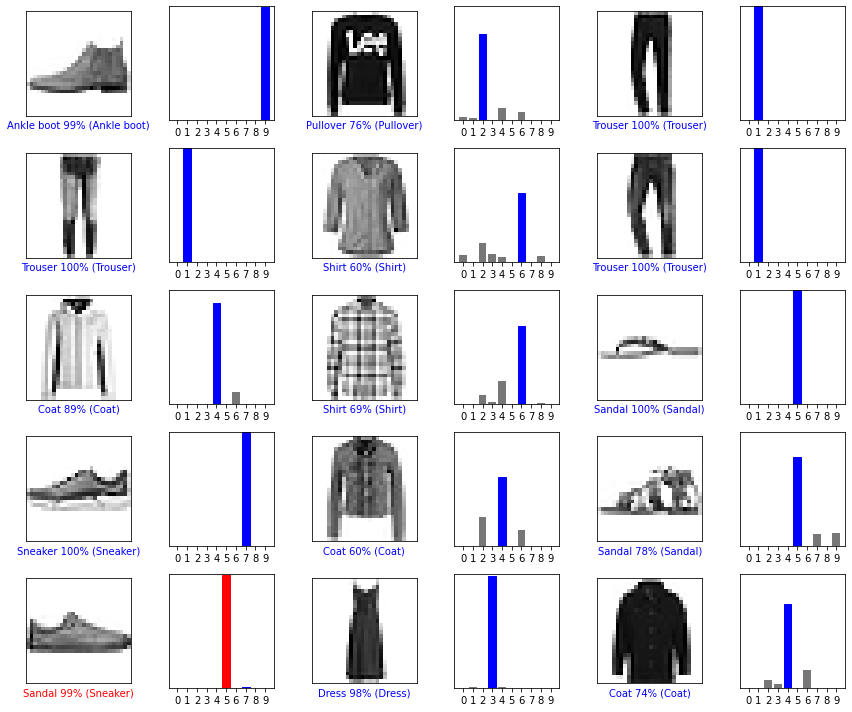

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.6712738e-02 1.8633312e-02 7.6235992e-01 7.2877998e-03 1.0973957e-01
  3.2545213e-11 7.5096406e-02 9.2013618e-38 1.7027922e-04 1.0200547e-19]]


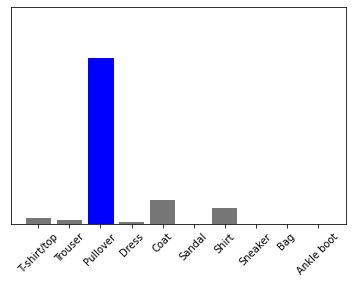

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2